# 1. Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [3]:
from datetime import datetime, timedelta

In [4]:
import yfinance as yf

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
start = datetime(2013,1,1)
end = datetime(2023, 11, 23)

In [7]:
google = yf.Ticker('GOOG')
msft=yf.Ticker('MSFT')
appl=yf.Ticker('AAPL')
amzn=yf.Ticker('AMZN')

In [8]:
google_df = google.history(start=start, end=end)
msft_df = msft.history(start=start, end=end)
appl_df=appl.history(start=start, end=end)
amzn_df=amzn.history(start=start, end=end)

# 2. Pre-processing

In [9]:
g_returns = 100 * google_df[['Close']].pct_change().dropna() 
ms_returns = 100 * msft_df[['Close']].pct_change().dropna() 
appl_returns=100 * appl_df[['Close']].pct_change().dropna() 
amzn_returns=100 * amzn_df[['Close']].pct_change().dropna() 

In [10]:
g_vol = g_returns**2
ms_vol = ms_returns**2
appl_vol=appl_returns**2
amzn_vol=amzn_returns**2

In [11]:
df_all = pd.concat([g_vol, ms_vol, appl_vol, amzn_vol], axis=1)

df_all.columns = ['Google', 'Microsoft', 'Apple', 'Amazon']

df_all.head()

,Google,Microsoft,Apple,Amazon
Date,,,,
2013-01-03 00:00:00-05:00,0.003373,1.794528,1.593220,0.206751
2013-01-04 00:00:00-05:00,3.904728,3.502799,7.758665,0.067191
2013-01-07 00:00:00-05:00,0.190380,0.034958,0.346027,12.906149
2013-01-08 00:00:00-05:00,0.038948,0.275144,0.072422,0.600300
2013-01-09 00:00:00-05:00,0.432050,0.319183,2.442542,0.000127


### Decomposition

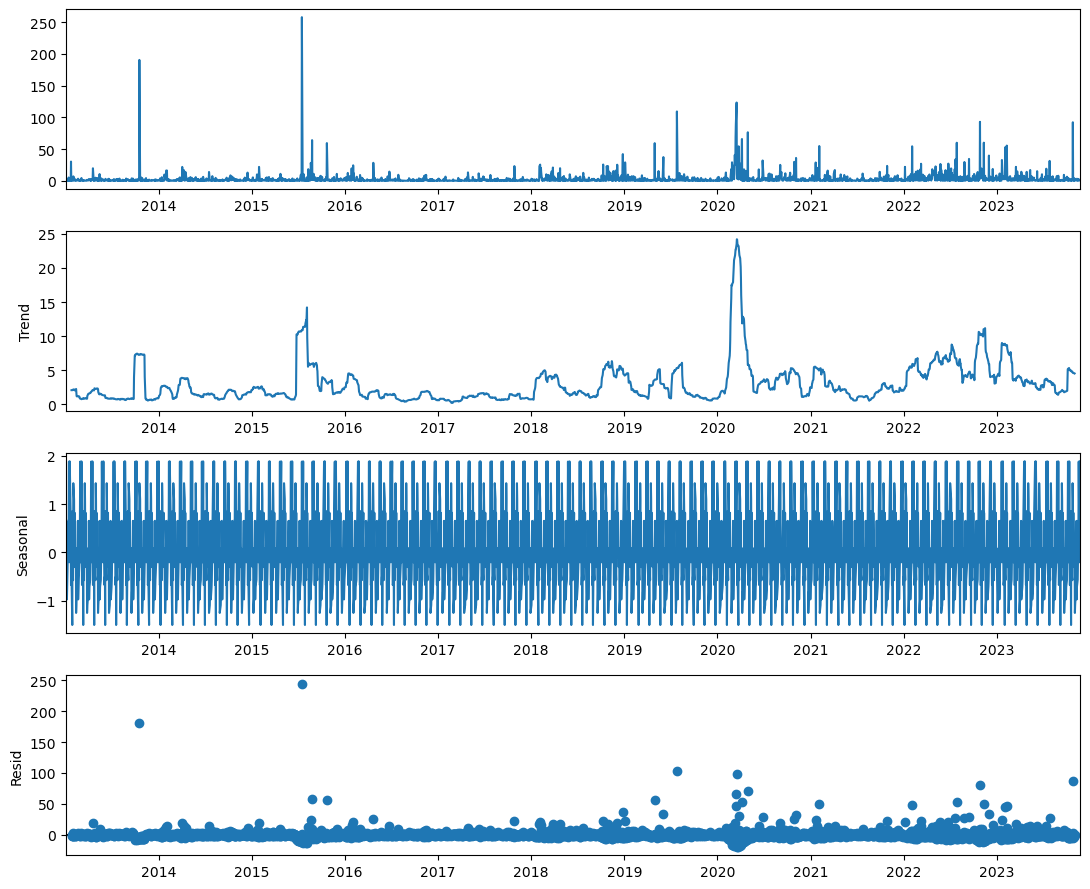

In [12]:
from pylab import rcParams

# Google

rcParams['figure.figsize'] = 11, 9
decomposed = sm.tsa.seasonal_decompose(g_vol,period=30) # Check whether there exists monthly seasonality
figure = decomposed.plot() 
plt.show()

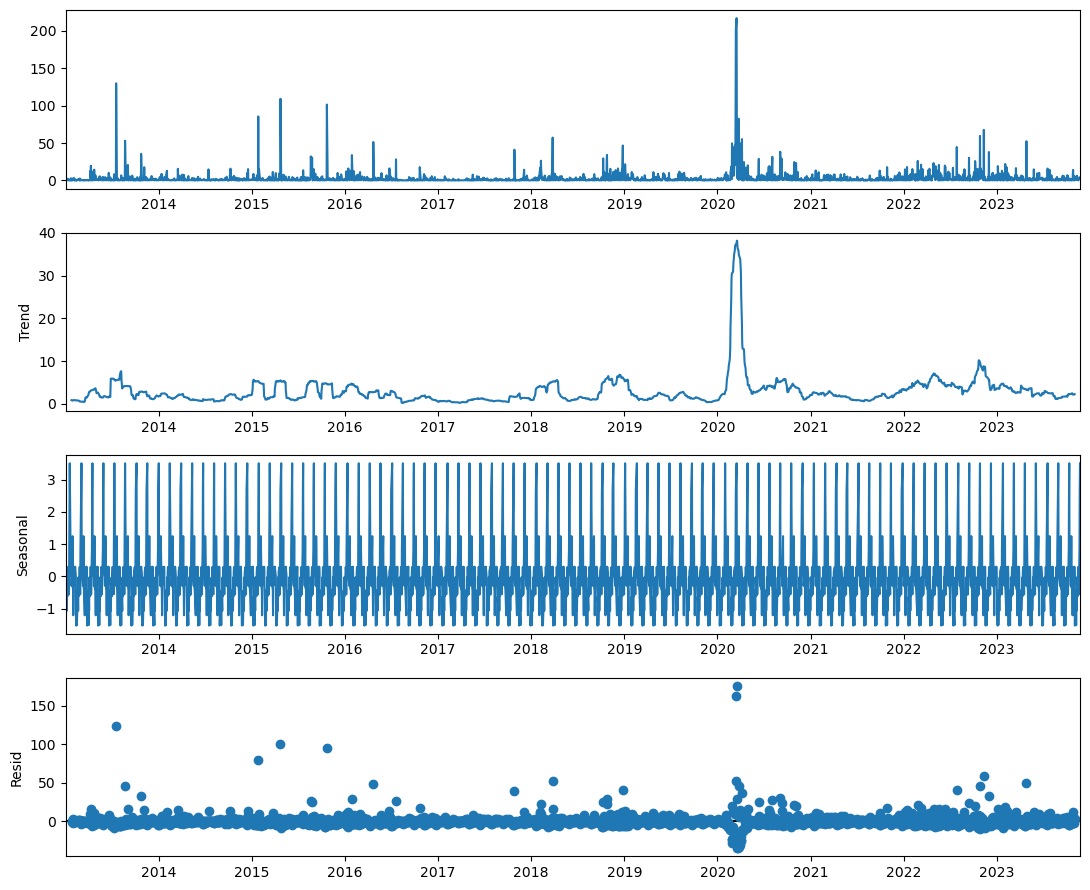

In [13]:
# Microsoft
rcParams['figure.figsize'] = 11, 9
decomposed = sm.tsa.seasonal_decompose(ms_vol,period=30) # Check whether there exists monthly seasonality
figure = decomposed.plot() 
plt.show()

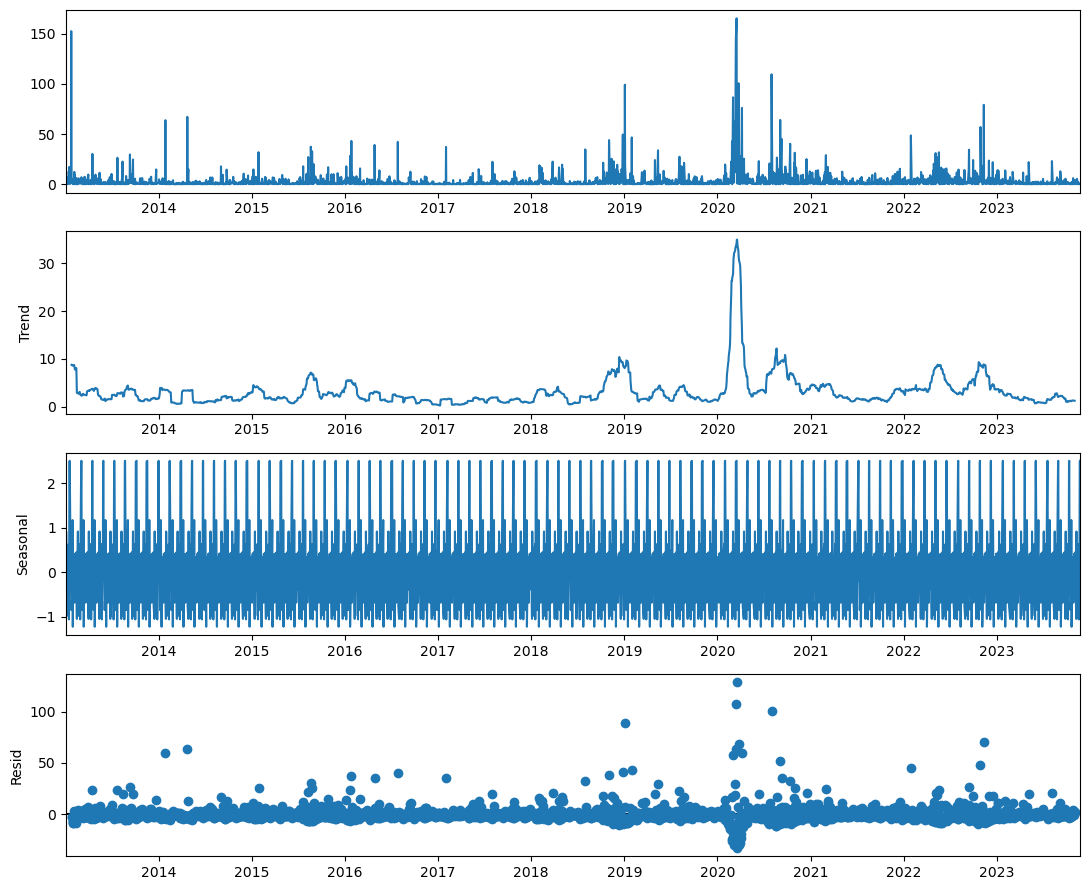

In [14]:
# Apple

rcParams['figure.figsize'] = 11, 9
decomposed = sm.tsa.seasonal_decompose(appl_vol,period=30) # Check whether there exists monthly seasonality
figure = decomposed.plot() 
plt.show()

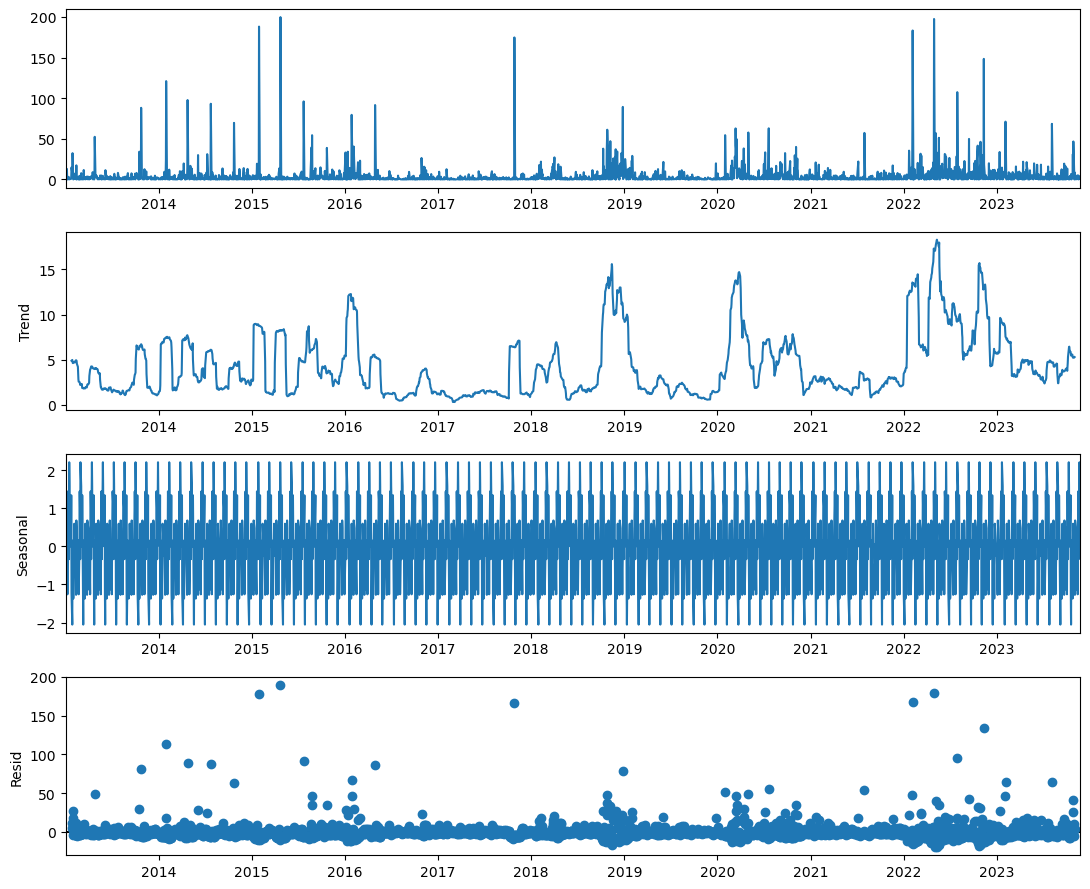

In [15]:
#Amazon

rcParams['figure.figsize'] = 11, 9
decomposed = sm.tsa.seasonal_decompose(amzn_vol,period=30) # Check whether there exists monthly seasonality
figure = decomposed.plot() 
plt.show()

### Correlations

Text(0.5, 1.0, 'Correlation of stock close price')

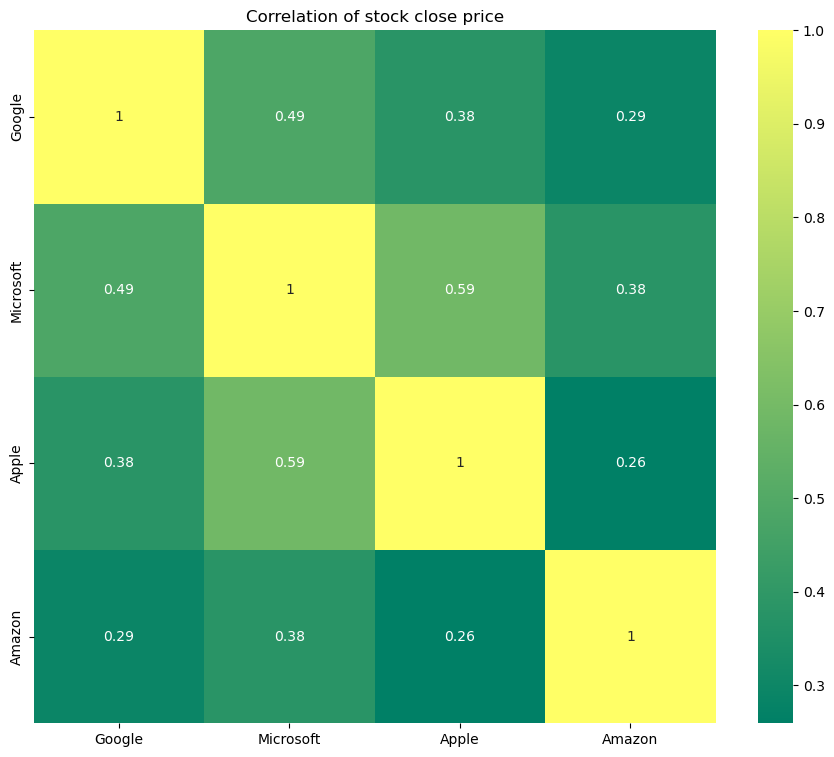

In [16]:
import seaborn as sns
plt.figure()
sns.heatmap(df_all.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock close price')

## Stationarity Check

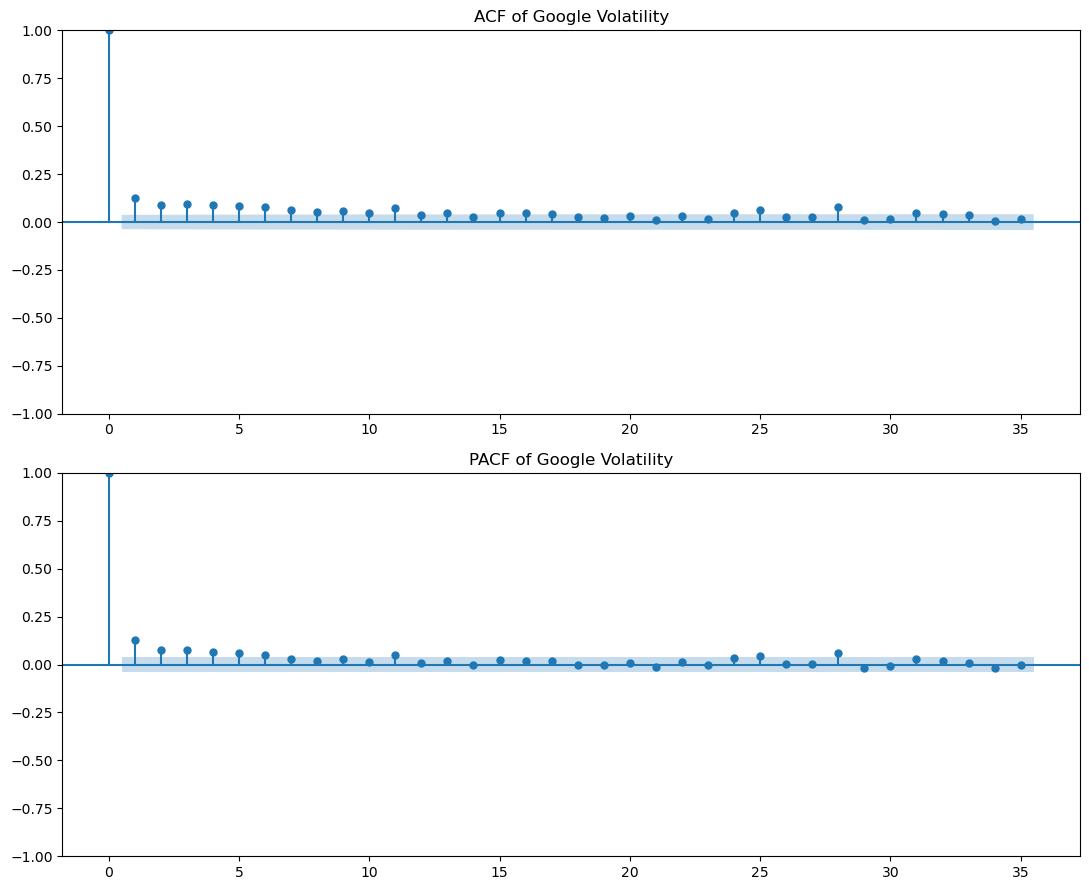

In [17]:
fig, axs = plt.subplots(2)

plot_acf(g_vol, ax=axs[0])
axs[0].set_title('ACF of Google Volatility')
plot_pacf(g_vol, ax=axs[1])
axs[1].set_title('PACF of Google Volatility')

plt.tight_layout()
plt.show()

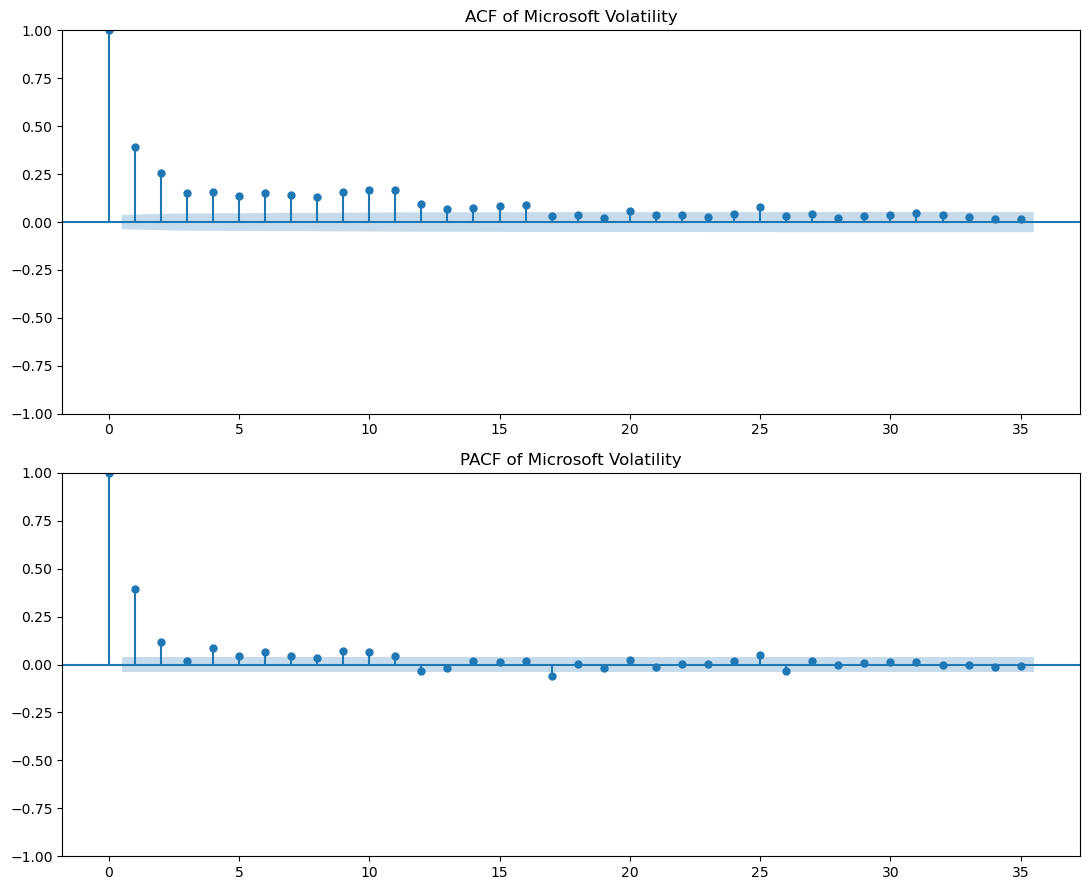

In [18]:
fig, axs = plt.subplots(2)

plot_acf(ms_vol, ax=axs[0])
axs[0].set_title('ACF of Microsoft Volatility')
plot_pacf(ms_vol, ax=axs[1])
axs[1].set_title('PACF of Microsoft Volatility')

plt.tight_layout()
plt.show()

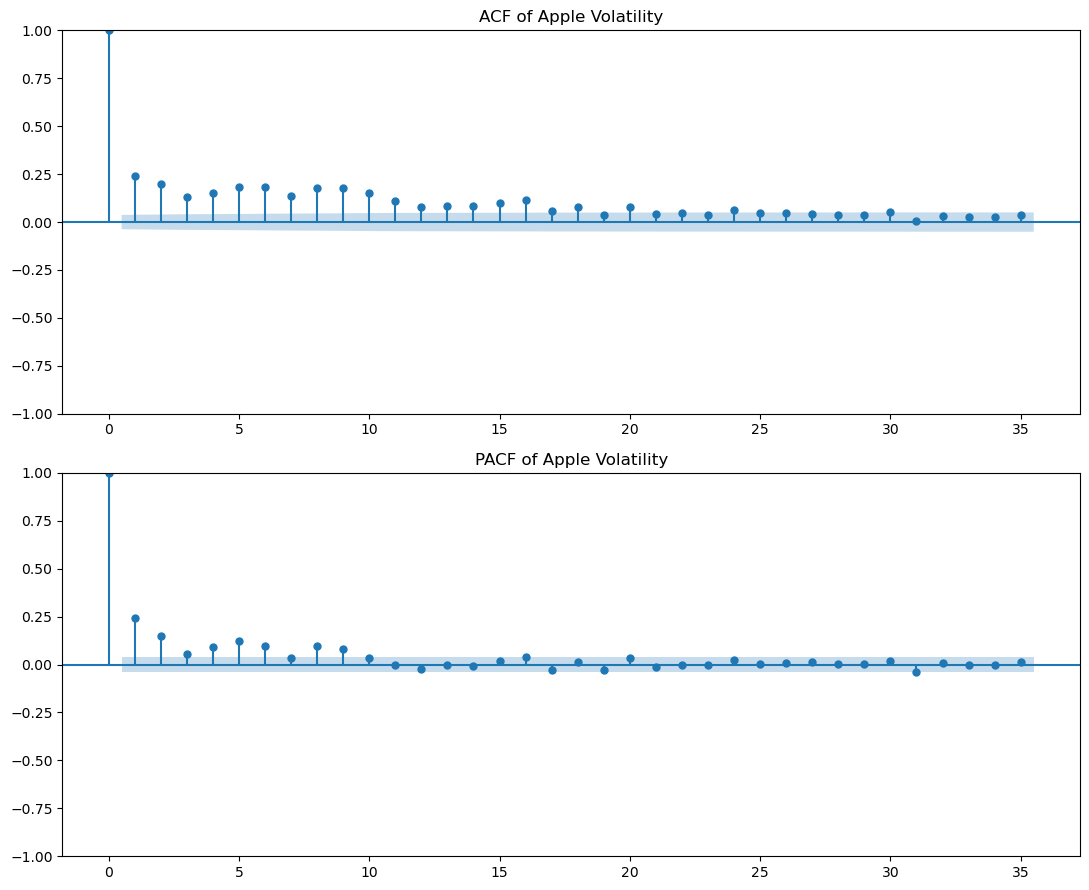

In [19]:
fig, axs = plt.subplots(2)

plot_acf(appl_vol, ax=axs[0])
axs[0].set_title('ACF of Apple Volatility')
plot_pacf(appl_vol, ax=axs[1])
axs[1].set_title('PACF of Apple Volatility')

plt.tight_layout()
plt.show()

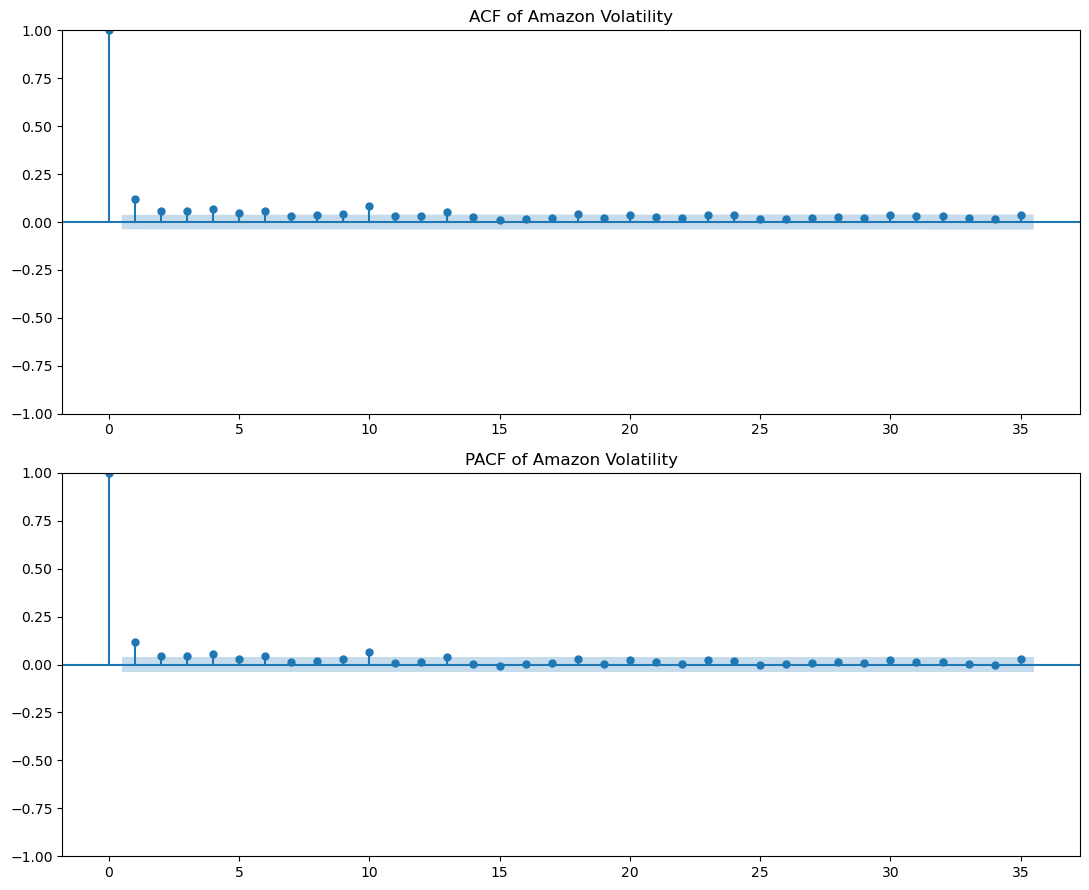

In [20]:
fig, axs = plt.subplots(2)

plot_acf(amzn_vol, ax=axs[0])
axs[0].set_title('ACF of Amazon Volatility')
plot_pacf(amzn_vol, ax=axs[1])
axs[1].set_title('PACF of Amazon Volatility')

plt.tight_layout()
plt.show()

### Transform them to stationary

In [21]:
#放在这儿备用，确认没用后删

#g_diff = g_close.diff().dropna()
#ms_diff = ms_close.diff().dropna()
#amzn_diff = amzn_close.diff().dropna()
#appl_diff = appl_close.diff().dropna()

### The Augmented Dickey-Fuller test

In [22]:
from statsmodels.tsa.stattools import adfuller

goo_adftest = adfuller(g_vol)
goo_adf_results= pd.Series(goo_adftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in goo_adftest[4].items():
    goo_adf_results['Critical Value (%s)'%key] = value
goo_adf_results

Test Statistic                -1.200294e+01
p-value                        3.314076e-22
#Lags Used                     1.000000e+01
Number of Observations Used    2.731000e+03
Critical Value (1%)           -3.432747e+00
Critical Value (5%)           -2.862599e+00
Critical Value (10%)          -2.567334e+00
dtype: float64

In [23]:
from statsmodels.tsa.stattools import adfuller

ms_adftest = adfuller(ms_vol)
ms_adf_results= pd.Series(ms_adftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in ms_adftest[4].items():
    ms_adf_results['Critical Value (%s)'%key] = value
ms_adf_results

Test Statistic                -9.532858e+00
p-value                        2.859802e-16
#Lags Used                     1.600000e+01
Number of Observations Used    2.725000e+03
Critical Value (1%)           -3.432752e+00
Critical Value (5%)           -2.862601e+00
Critical Value (10%)          -2.567335e+00
dtype: float64

In [24]:
from statsmodels.tsa.stattools import adfuller

amzn_adftest = adfuller(amzn_vol)
amzn_adf_results= pd.Series(amzn_adftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in amzn_adftest[4].items():
    amzn_adf_results['Critical Value (%s)'%key] = value
amzn_adf_results

Test Statistic                -1.315618e+01
p-value                        1.335843e-24
#Lags Used                     9.000000e+00
Number of Observations Used    2.732000e+03
Critical Value (1%)           -3.432746e+00
Critical Value (5%)           -2.862599e+00
Critical Value (10%)          -2.567333e+00
dtype: float64

In [25]:
appl_adftest = adfuller(appl_vol)
appl_adf_results= pd.Series(appl_adftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in appl_adftest[4].items():
    appl_adf_results['Critical Value (%s)'%key] = value
appl_adf_results

Test Statistic                -9.784170e+00
p-value                        6.611153e-17
#Lags Used                     9.000000e+00
Number of Observations Used    2.732000e+03
Critical Value (1%)           -3.432746e+00
Critical Value (5%)           -2.862599e+00
Critical Value (10%)          -2.567333e+00
dtype: float64

In [26]:
# Reject all H0, unit root doesn't exists. All stationary(trend-stationary).

# 3. Fit VAR model

In [27]:
# Train (90%) & Test (10%) Split

nobs = round(0.1*len(df_all))
train, test = df_all[0:-nobs], df_all[-nobs:]

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2468 entries, 2013-01-03 00:00:00-05:00 to 2022-10-20 00:00:00-04:00
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Google     2468 non-null   float64
 1   Microsoft  2468 non-null   float64
 2   Apple      2468 non-null   float64
 3   Amazon     2468 non-null   float64
dtypes: float64(4)
memory usage: 96.4 KB


In [29]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 274 entries, 2022-10-21 00:00:00-04:00 to 2023-11-22 00:00:00-05:00
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Google     274 non-null    float64
 1   Microsoft  274 non-null    float64
 2   Apple      274 non-null    float64
 3   Amazon     274 non-null    float64
dtypes: float64(4)
memory usage: 10.7 KB


In [30]:
model = VAR(df_all)
aic=[]
for i in range(30):
    result = model.fit(i)
    aic.append(result.aic)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')
    


Lag Order = 0
AIC :  17.49314230253358
BIC :  17.501773145509688
FPE :  39552612.382955104
HQIC:  17.496261024549955 

Lag Order = 1
AIC :  17.296593460649973
BIC :  17.339760757959734
FPE :  32494892.361331414
HQIC:  17.312192087331017 

Lag Order = 2
AIC :  17.27667915083364
BIC :  17.354403849803624
FPE :  31854182.350119997
HQIC:  17.304765714831536 

Lag Order = 3
AIC :  17.274604481083887
BIC :  17.38690754964967
FPE :  31788170.00783641
HQIC:  17.315187023184567 

Lag Order = 4
AIC :  17.26937936980751
BIC :  17.41628179654151
FPE :  31622517.632844206
HQIC:  17.322465938941864 

Lag Order = 5
AIC :  17.223083112603078
BIC :  17.404605906742436
FPE :  30191902.49637522
HQIC:  17.28868176585815 

Lag Order = 6
AIC :  17.21979074531109
BIC :  17.435954936785595
FPE :  30092688.096658297
HQIC:  17.29790954794131 

Lag Order = 7
AIC :  17.22974272465595
BIC :  17.480569364116025
FPE :  30393699.87277501
HQIC:  17.320389750094378 

Lag Order = 8
AIC :  17.232027708242047
BIC :  17.51

In [31]:
aic.sort()
aic

[17.08814429820128,
 17.09449530517129,
 17.09813384435733,
 17.105825186300287,
 17.11323634822988,
 17.119650909312107,
 17.12876697480568,
 17.140528840965448,
 17.148902352212815,
 17.156250817442345,
 17.15754043625038,
 17.167891315419524,
 17.176082470406293,
 17.18134291416314,
 17.189989908070018,
 17.21979074531109,
 17.223083112603078,
 17.22974272465595,
 17.229810552725496,
 17.231275957218628,
 17.232027708242047,
 17.237024498476664,
 17.246787891367614,
 17.25415038441707,
 17.26117401889274,
 17.26937936980751,
 17.274604481083887,
 17.27667915083364,
 17.296593460649973,
 17.49314230253358]

In [32]:
# lag=15时有最小的AIC

In [56]:
# According to AIC check, the explicitly computed AIC is the lowest at lag 1.

model = VAR(train)
model_fitted = model.fit(15)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 28, Nov, 2023
Time:                     18:06:58
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    17.6187
Nobs:                     2726.00    HQIC:                   17.2809
Log likelihood:          -38521.3    FPE:                2.64209e+07
AIC:                      17.0896    Det(Omega_mle):     2.41826e+07
--------------------------------------------------------------------
Results for equation Google
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                 1.353837         0.262431            5.159           0.000
L1.Google             0.029539         0.021821            1.354           0.176
L1.Microsoft          0.110693         0.027997            

## Granger Casuality Check

In [57]:
# As the data is stationary, so we can now conduct Granger Casuality Check

In [58]:
from statsmodels.tsa.stattools import grangercausalitytests

In [59]:
for i in range(len(df_all.columns)):
    for j in range(len(df_all.columns)):
        if i != j:
            print(f"\nGranger Causality test for {df_all.columns[j]} caused by {df_all.columns[i]}:")
            grangercausalitytests(df_all[[df_all.columns[j], df_all.columns[i]]], maxlag=30)



Granger Causality test for Microsoft caused by Google:

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.3448  , p=0.0675  , df_denom=2738, df_num=1
ssr based chi2 test:   chi2=3.3485  , p=0.0673  , df=1
likelihood ratio test: chi2=3.3464  , p=0.0674  , df=1
parameter F test:         F=3.3448  , p=0.0675  , df_denom=2738, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.5066  , p=0.0111  , df_denom=2735, df_num=2
ssr based chi2 test:   chi2=9.0297  , p=0.0109  , df=2
likelihood ratio test: chi2=9.0149  , p=0.0110  , df=2
parameter F test:         F=4.5066  , p=0.0111  , df_denom=2735, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=7.9766  , p=0.0000  , df_denom=2732, df_num=3
ssr based chi2 test:   chi2=23.9911 , p=0.0000  , df=3
likelihood ratio test: chi2=23.8866 , p=0.0000  , df=3
parameter F test:         F=7.9766  , p=0.0000  , df_denom=2732, df_num=3

Granger Causality
number of lag

ssr based F test:         F=1.4238  , p=0.0636  , df_denom=2651, df_num=30
ssr based chi2 test:   chi2=43.6967 , p=0.0508  , df=30
likelihood ratio test: chi2=43.3484 , p=0.0546  , df=30
parameter F test:         F=1.4238  , p=0.0636  , df_denom=2651, df_num=30

Granger Causality test for Apple caused by Google:

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=29.9740 , p=0.0000  , df_denom=2738, df_num=1
ssr based chi2 test:   chi2=30.0068 , p=0.0000  , df=1
likelihood ratio test: chi2=29.8437 , p=0.0000  , df=1
parameter F test:         F=29.9740 , p=0.0000  , df_denom=2738, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=16.0479 , p=0.0000  , df_denom=2735, df_num=2
ssr based chi2 test:   chi2=32.1546 , p=0.0000  , df=2
likelihood ratio test: chi2=31.9673 , p=0.0000  , df=2
parameter F test:         F=16.0479 , p=0.0000  , df_denom=2735, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=11.6

ssr based F test:         F=27.5774 , p=0.0000  , df_denom=2723, df_num=6
ssr based chi2 test:   chi2=166.2543, p=0.0000  , df=6
likelihood ratio test: chi2=161.3988, p=0.0000  , df=6
parameter F test:         F=27.5774 , p=0.0000  , df_denom=2723, df_num=6

Granger Causality
number of lags (no zero) 7
ssr based F test:         F=23.5510 , p=0.0000  , df_denom=2720, df_num=7
ssr based chi2 test:   chi2=165.7661, p=0.0000  , df=7
likelihood ratio test: chi2=160.9368, p=0.0000  , df=7
parameter F test:         F=23.5510 , p=0.0000  , df_denom=2720, df_num=7

Granger Causality
number of lags (no zero) 8
ssr based F test:         F=20.5047 , p=0.0000  , df_denom=2717, df_num=8
ssr based chi2 test:   chi2=165.0636, p=0.0000  , df=8
likelihood ratio test: chi2=160.2727, p=0.0000  , df=8
parameter F test:         F=20.5047 , p=0.0000  , df_denom=2717, df_num=8

Granger Causality
number of lags (no zero) 9
ssr based F test:         F=18.0873 , p=0.0000  , df_denom=2714, df_num=9
ssr based chi2

ssr based F test:         F=3.4293  , p=0.0000  , df_denom=2687, df_num=18
ssr based chi2 test:   chi2=62.5769 , p=0.0000  , df=18
likelihood ratio test: chi2=61.8689 , p=0.0000  , df=18
parameter F test:         F=3.4293  , p=0.0000  , df_denom=2687, df_num=18

Granger Causality
number of lags (no zero) 19
ssr based F test:         F=3.2481  , p=0.0000  , df_denom=2684, df_num=19
ssr based chi2 test:   chi2=62.6109 , p=0.0000  , df=19
likelihood ratio test: chi2=61.9019 , p=0.0000  , df=19
parameter F test:         F=3.2481  , p=0.0000  , df_denom=2684, df_num=19

Granger Causality
number of lags (no zero) 20
ssr based F test:         F=3.1528  , p=0.0000  , df_denom=2681, df_num=20
ssr based chi2 test:   chi2=64.0195 , p=0.0000  , df=20
likelihood ratio test: chi2=63.2782 , p=0.0000  , df=20
parameter F test:         F=3.1528  , p=0.0000  , df_denom=2681, df_num=20

Granger Causality
number of lags (no zero) 21
ssr based F test:         F=3.0251  , p=0.0000  , df_denom=2678, df_num=2

ssr based F test:         F=3.0333  , p=0.0000  , df_denom=2669, df_num=24
ssr based chi2 test:   chi2=74.1347 , p=0.0000  , df=24
likelihood ratio test: chi2=73.1417 , p=0.0000  , df=24
parameter F test:         F=3.0333  , p=0.0000  , df_denom=2669, df_num=24

Granger Causality
number of lags (no zero) 25
ssr based F test:         F=2.9594  , p=0.0000  , df_denom=2666, df_num=25
ssr based chi2 test:   chi2=75.4008 , p=0.0000  , df=25
likelihood ratio test: chi2=74.3735 , p=0.0000  , df=25
parameter F test:         F=2.9594  , p=0.0000  , df_denom=2666, df_num=25

Granger Causality
number of lags (no zero) 26
ssr based F test:         F=2.8876  , p=0.0000  , df_denom=2663, df_num=26
ssr based chi2 test:   chi2=76.5716 , p=0.0000  , df=26
likelihood ratio test: chi2=75.5120 , p=0.0000  , df=26
parameter F test:         F=2.8876  , p=0.0000  , df_denom=2663, df_num=26

Granger Causality
number of lags (no zero) 27
ssr based F test:         F=2.7855  , p=0.0000  , df_denom=2660, df_num=2

ssr based F test:         F=2.6130  , p=0.0001  , df_denom=2678, df_num=21
ssr based chi2 test:   chi2=55.7536 , p=0.0001  , df=21
likelihood ratio test: chi2=55.1901 , p=0.0001  , df=21
parameter F test:         F=2.6130  , p=0.0001  , df_denom=2678, df_num=21

Granger Causality
number of lags (no zero) 22
ssr based F test:         F=2.4905  , p=0.0001  , df_denom=2675, df_num=22
ssr based chi2 test:   chi2=55.7122 , p=0.0001  , df=22
likelihood ratio test: chi2=55.1493 , p=0.0001  , df=22
parameter F test:         F=2.4905  , p=0.0001  , df_denom=2675, df_num=22

Granger Causality
number of lags (no zero) 23
ssr based F test:         F=2.3762  , p=0.0002  , df_denom=2672, df_num=23
ssr based chi2 test:   chi2=55.6146 , p=0.0002  , df=23
likelihood ratio test: chi2=55.0535 , p=0.0002  , df=23
parameter F test:         F=2.3762  , p=0.0002  , df_denom=2672, df_num=23

Granger Causality
number of lags (no zero) 24
ssr based F test:         F=2.2969  , p=0.0003  , df_denom=2669, df_num=2

ssr based F test:         F=3.0992  , p=0.0000  , df_denom=2681, df_num=20
ssr based chi2 test:   chi2=62.9311 , p=0.0000  , df=20
likelihood ratio test: chi2=62.2146 , p=0.0000  , df=20
parameter F test:         F=3.0992  , p=0.0000  , df_denom=2681, df_num=20

Granger Causality
number of lags (no zero) 21
ssr based F test:         F=3.0090  , p=0.0000  , df_denom=2678, df_num=21
ssr based chi2 test:   chi2=64.2026 , p=0.0000  , df=21
likelihood ratio test: chi2=63.4569 , p=0.0000  , df=21
parameter F test:         F=3.0090  , p=0.0000  , df_denom=2678, df_num=21

Granger Causality
number of lags (no zero) 22
ssr based F test:         F=2.8943  , p=0.0000  , df_denom=2675, df_num=22
ssr based chi2 test:   chi2=64.7465 , p=0.0000  , df=22
likelihood ratio test: chi2=63.9879 , p=0.0000  , df=22
parameter F test:         F=2.8943  , p=0.0000  , df_denom=2675, df_num=22

Granger Causality
number of lags (no zero) 23
ssr based F test:         F=2.8014  , p=0.0000  , df_denom=2672, df_num=2

ssr based F test:         F=4.3121  , p=0.0000  , df_denom=2663, df_num=26
ssr based chi2 test:   chi2=114.3466, p=0.0000  , df=26
likelihood ratio test: chi2=112.0051, p=0.0000  , df=26
parameter F test:         F=4.3121  , p=0.0000  , df_denom=2663, df_num=26

Granger Causality
number of lags (no zero) 27
ssr based F test:         F=4.1893  , p=0.0000  , df_denom=2660, df_num=27
ssr based chi2 test:   chi2=115.4502, p=0.0000  , df=27
likelihood ratio test: chi2=113.0630, p=0.0000  , df=27
parameter F test:         F=4.1893  , p=0.0000  , df_denom=2660, df_num=27

Granger Causality
number of lags (no zero) 28
ssr based F test:         F=4.0508  , p=0.0000  , df_denom=2657, df_num=28
ssr based chi2 test:   chi2=115.8559, p=0.0000  , df=28
likelihood ratio test: chi2=113.4513, p=0.0000  , df=28
parameter F test:         F=4.0508  , p=0.0000  , df_denom=2657, df_num=28

Granger Causality
number of lags (no zero) 29
ssr based F test:         F=3.9202  , p=0.0000  , df_denom=2654, df_num=2

ssr based F test:         F=2.4308  , p=0.0000  , df_denom=2651, df_num=30
ssr based chi2 test:   chi2=74.6034 , p=0.0000  , df=30
likelihood ratio test: chi2=73.5958 , p=0.0000  , df=30
parameter F test:         F=2.4308  , p=0.0000  , df_denom=2651, df_num=30

Granger Causality test for Google caused by Amazon:

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.3832  , p=0.0364  , df_denom=2738, df_num=1
ssr based chi2 test:   chi2=4.3880  , p=0.0362  , df=1
likelihood ratio test: chi2=4.3845  , p=0.0363  , df=1
parameter F test:         F=4.3832  , p=0.0364  , df_denom=2738, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.5797  , p=0.0760  , df_denom=2735, df_num=2
ssr based chi2 test:   chi2=5.1689  , p=0.0754  , df=2
likelihood ratio test: chi2=5.1640  , p=0.0756  , df=2
parameter F test:         F=2.5797  , p=0.0760  , df_denom=2735, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.1

ssr based F test:         F=0.4988  , p=0.9885  , df_denom=2654, df_num=29
ssr based chi2 test:   chi2=14.7858 , p=0.9866  , df=29
likelihood ratio test: chi2=14.7457 , p=0.9869  , df=29
parameter F test:         F=0.4988  , p=0.9885  , df_denom=2654, df_num=29

Granger Causality
number of lags (no zero) 30
ssr based F test:         F=0.5979  , p=0.9590  , df_denom=2651, df_num=30
ssr based chi2 test:   chi2=18.3499 , p=0.9526  , df=30
likelihood ratio test: chi2=18.2881 , p=0.9537  , df=30
parameter F test:         F=0.5979  , p=0.9590  , df_denom=2651, df_num=30

Granger Causality test for Microsoft caused by Amazon:

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5637  , p=0.2112  , df_denom=2738, df_num=1
ssr based chi2 test:   chi2=1.5654  , p=0.2109  , df=1
likelihood ratio test: chi2=1.5650  , p=0.2109  , df=1
parameter F test:         F=1.5637  , p=0.2112  , df_denom=2738, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:      

ssr based F test:         F=0.7891  , p=0.7762  , df_denom=2657, df_num=28
ssr based chi2 test:   chi2=22.5676 , p=0.7544  , df=28
likelihood ratio test: chi2=22.4743 , p=0.7589  , df=28
parameter F test:         F=0.7891  , p=0.7762  , df_denom=2657, df_num=28

Granger Causality
number of lags (no zero) 29
ssr based F test:         F=0.8883  , p=0.6380  , df_denom=2654, df_num=29
ssr based chi2 test:   chi2=26.3320 , p=0.6077  , df=29
likelihood ratio test: chi2=26.2050 , p=0.6145  , df=29
parameter F test:         F=0.8883  , p=0.6380  , df_denom=2654, df_num=29

Granger Causality
number of lags (no zero) 30
ssr based F test:         F=0.9376  , p=0.5637  , df_denom=2651, df_num=30
ssr based chi2 test:   chi2=28.7745 , p=0.5295  , df=30
likelihood ratio test: chi2=28.6229 , p=0.5375  , df=30
parameter F test:         F=0.9376  , p=0.5637  , df_denom=2651, df_num=30

Granger Causality test for Apple caused by Amazon:

Granger Causality
number of lags (no zero) 1
ssr based F test:     

ssr based F test:         F=0.6428  , p=0.9168  , df_denom=2663, df_num=26
ssr based chi2 test:   chi2=17.0463 , p=0.9077  , df=26
likelihood ratio test: chi2=16.9930 , p=0.9093  , df=26
parameter F test:         F=0.6428  , p=0.9168  , df_denom=2663, df_num=26

Granger Causality
number of lags (no zero) 27
ssr based F test:         F=0.6269  , p=0.9323  , df_denom=2660, df_num=27
ssr based chi2 test:   chi2=17.2772 , p=0.9241  , df=27
likelihood ratio test: chi2=17.2224 , p=0.9255  , df=27
parameter F test:         F=0.6269  , p=0.9323  , df_denom=2660, df_num=27

Granger Causality
number of lags (no zero) 28
ssr based F test:         F=0.6108  , p=0.9460  , df_denom=2657, df_num=28
ssr based chi2 test:   chi2=17.4684 , p=0.9388  , df=28
likelihood ratio test: chi2=17.4124 , p=0.9400  , df=28
parameter F test:         F=0.6108  , p=0.9460  , df_denom=2657, df_num=28

Granger Causality
number of lags (no zero) 29
ssr based F test:         F=0.6031  , p=0.9534  , df_denom=2654, df_num=2

In [60]:
results_df = pd.DataFrame(columns=df_all.columns, index=df_all.columns)

for i in range(len(df_all.columns)):
    for j in range(len(df_all.columns)):
        if i != j:
            
            test_result=grangercausalitytests(df_all[[df_all.columns[j], df_all.columns[i]]], maxlag=30, verbose=False)
            
            # Get the p-value of the F-test for the last lag
            p_value = test_result[2][0]['ssr_ftest'][1]
            
            # If the p-value is less than 0.05, we reject the null hypothesis and conclude that
            # the column variable Granger-causes the index variable
            results_df.loc[df_all.columns[j], df_all.columns[i]] = p_value < 0.05

print(results_df)

          Google Microsoft Apple Amazon
Google       NaN      True  True  False
Microsoft   True       NaN  True  False
Apple       True      True   NaN  False
Amazon      True      True  True    NaN


### DW-Test of the residuals

In [61]:
from statsmodels.stats.stattools import durbin_watson

out = durbin_watson(model_fitted.resid)
for col, val in zip(train.columns, out):
    print(col, ':', round(val, 4))


Google : 2.0009
Microsoft : 1.9976
Apple : 1.9837
Amazon : 2.0


# 4. Forecast

## Simple Forecast

In [62]:
lag_order = model_fitted.k_ar
print(lag_order)

15


In [63]:
forecast_input = train.values[-lag_order:]
forecast_input

array([[3.28207323e+00, 5.54255838e+00, 3.51136232e+00, 8.63104741e+00],
       [6.26826683e-01, 4.22708654e-01, 4.28212448e+00, 6.10003556e-01],
       [1.93800971e+00, 1.65423601e+00, 2.68444087e-01, 1.47350306e-01],
       [6.86267900e-01, 1.11778949e+00, 2.13311943e+00, 6.76523269e-01],
       [5.22303889e-01, 1.25872569e+00, 2.08823108e+00, 4.51722521e+00],
       [4.21911719e-01, 5.48449004e-01, 3.46322765e-01, 1.94885253e-01],
       [1.38801875e+00, 4.77589611e-01, 6.88819711e-02, 1.08506315e+00],
       [3.23883848e+00, 6.19848579e+00, 5.39170534e+00, 4.43210699e+00],
       [9.81513731e-02, 6.54220287e-01, 7.36789126e-01, 4.56538783e-01],
       [1.79403071e+00, 9.58551986e-01, 2.04081532e+00, 5.06796685e+00],
       [4.92072009e-01, 1.64834459e-03, 9.24725977e-02, 3.18004795e+00],
       [2.89382055e+00, 3.09170655e+00, 8.17602492e-01, 6.67584075e-02],
       [1.61016255e+00, 2.82271361e+00, 1.11189824e-04, 2.70703242e+00],
       [5.12138827e-01, 4.21145217e+00, 8.60862402e

In [66]:
# Forecast
fore = model_fitted.forecast(y=forecast_input, steps=nobs)
forecast = pd.DataFrame(fore, index=df_all.index[-nobs:], columns=test.columns )
forecast

,Google,Microsoft,Apple,Amazon
Date,,,,
2022-10-21 00:00:00-04:00,1.585154,1.027020,1.615324,2.025573
2022-10-24 00:00:00-04:00,1.943720,1.152136,1.659134,3.326591
2022-10-25 00:00:00-04:00,2.271910,2.110771,2.377181,3.094597
2022-10-26 00:00:00-04:00,2.369192,2.111634,2.464253,3.011028
2022-10-27 00:00:00-04:00,2.040730,1.750652,1.945709,2.709962
...,...,...,...,...
2023-11-16 00:00:00-05:00,2.946734,2.815740,3.086901,4.234882
2023-11-17 00:00:00-05:00,2.946734,2.815740,3.086901,4.234882
2023-11-20 00:00:00-05:00,2.946734,2.815740,3.086901,4.234882


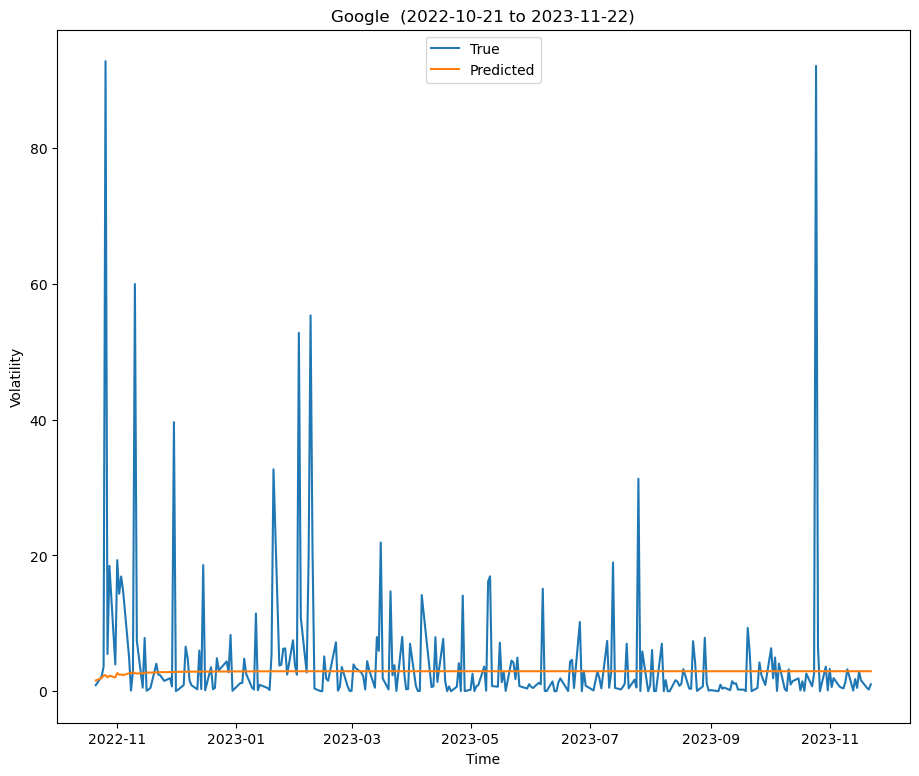

In [68]:
plt.plot(test['Google'], label='True')
plt.plot(forecast['Google'],label='Predicted')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.title('Google  (2022-10-21 to 2023-11-22)')
plt.legend()
plt.show()

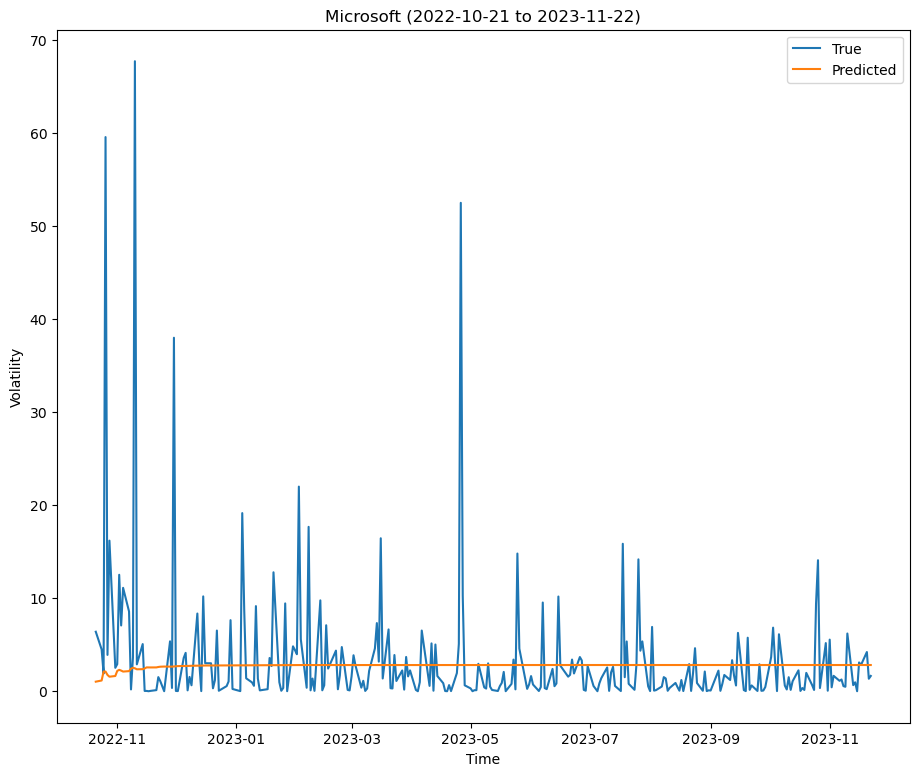

In [69]:
plt.plot(test['Microsoft'], label='True')
plt.plot(forecast['Microsoft'],label='Predicted')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.title('Microsoft (2022-10-21 to 2023-11-22)')
plt.legend()
plt.show()

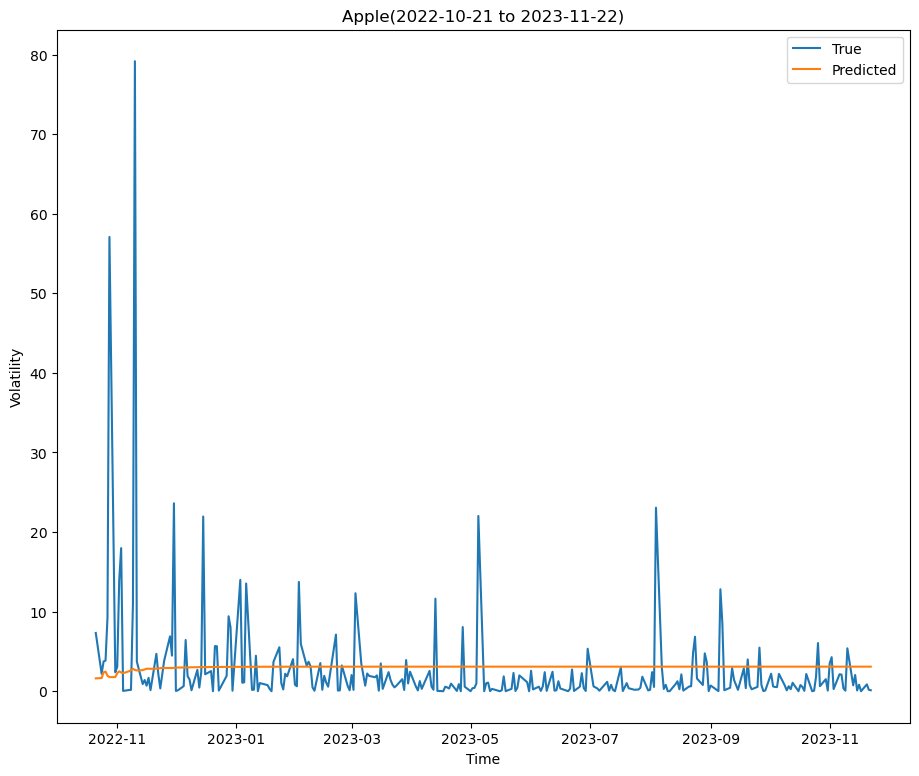

In [70]:
plt.plot(test['Apple'], label='True')
plt.plot(forecast['Apple'],label='Predicted')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.title('Apple(2022-10-21 to 2023-11-22)')
plt.legend()
plt.show()

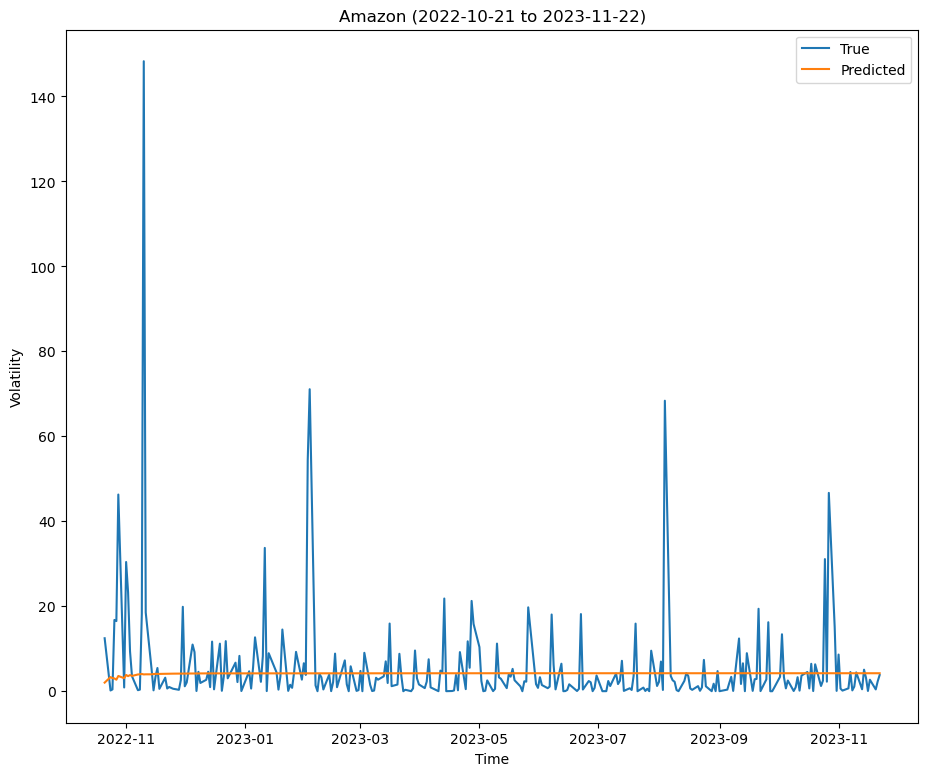

In [71]:
plt.plot(test['Amazon'], label='True')
plt.plot(forecast['Amazon'],label='Predicted')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.title('Amazon (2022-10-21 to 2023-11-22)')
plt.legend()
plt.show()

### Calculate the accuracy

In [72]:
def forecast_accuracy(forecast, actual):
    
    mse =np.mean((forecast - actual)**2)
    rmse = np.mean((forecast - actual)**2)**.5  

    return({'mse':mse,'rmse':rmse})

In [73]:
print('Forecast Accuracy of: Google')
accuracy_prod = forecast_accuracy(forecast['Google'], test['Google'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))


print('\nForecast Accuracy of: Microsoft')
accuracy_prod = forecast_accuracy(forecast['Microsoft'], test['Microsoft'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))


Forecast Accuracy of: Google
mse :  119.5883
rmse :  10.9356

Forecast Accuracy of: Microsoft
mse :  55.1291
rmse :  7.4249


## Rolling Forecast

In [75]:
rolling_predictions = pd.DataFrame()
test_size = len(test)

for i in range(test_size):
    train = df_all[:-(test_size-i)]  
    
    forecast_input = train.values[-lag_order:]
    
    model = VAR(train)
    model_fitted = model.fit(lag_order)
    pred = model_fitted.forecast(y=forecast_input, steps=1)
    forecast = pd.DataFrame(pred, columns=df_all.columns )
    rolling_predictions = rolling_predictions.append(forecast)

In [76]:
rolling_predictions.index = test.index
rolling_predictions

,Google,Microsoft,Apple,Amazon
Date,,,,
2022-10-21 00:00:00-04:00,3.816027,4.016217,4.610689,6.038958
2022-10-24 00:00:00-04:00,3.986004,4.759335,5.385654,6.167915
2022-10-25 00:00:00-04:00,2.785847,2.331572,3.696450,2.288710
2022-10-26 00:00:00-04:00,2.509480,1.109544,2.744894,5.024746
2022-10-27 00:00:00-04:00,11.377729,20.272747,16.017367,4.932515
...,...,...,...,...
2023-11-16 00:00:00-05:00,2.935939,1.710976,2.696121,3.796090
2023-11-17 00:00:00-05:00,1.282882,0.939919,1.311717,1.736184
2023-11-20 00:00:00-05:00,2.517730,2.053552,2.290308,3.059412


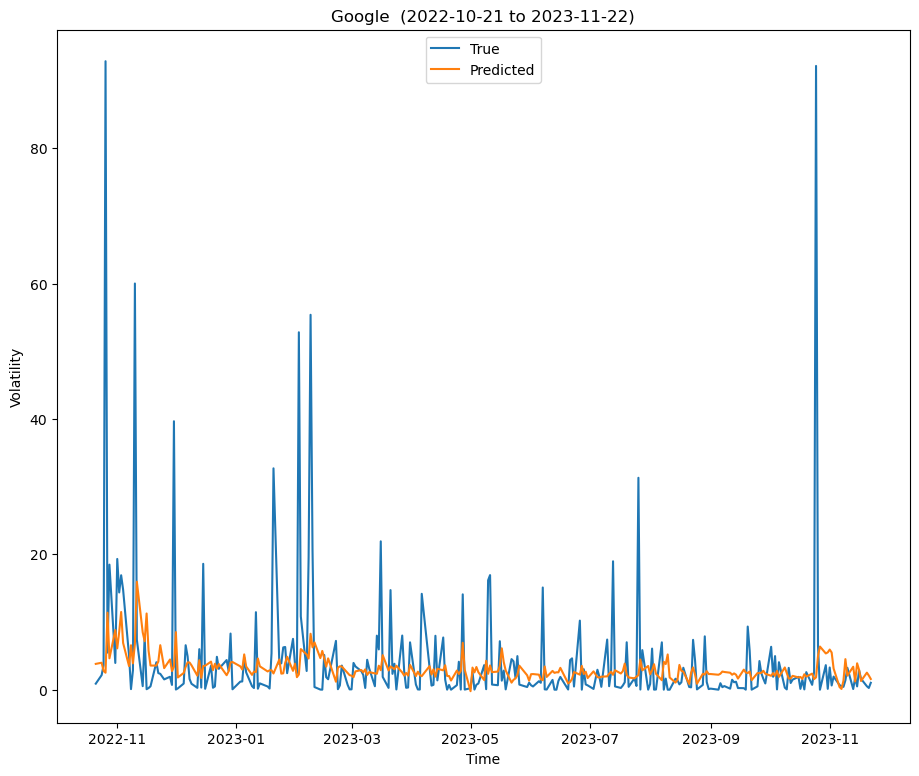

In [77]:
plt.plot(test['Google'], label='True')
plt.plot(rolling_predictions['Google'],label='Predicted')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.title('Google  (2022-10-21 to 2023-11-22)')
plt.legend()
plt.show()

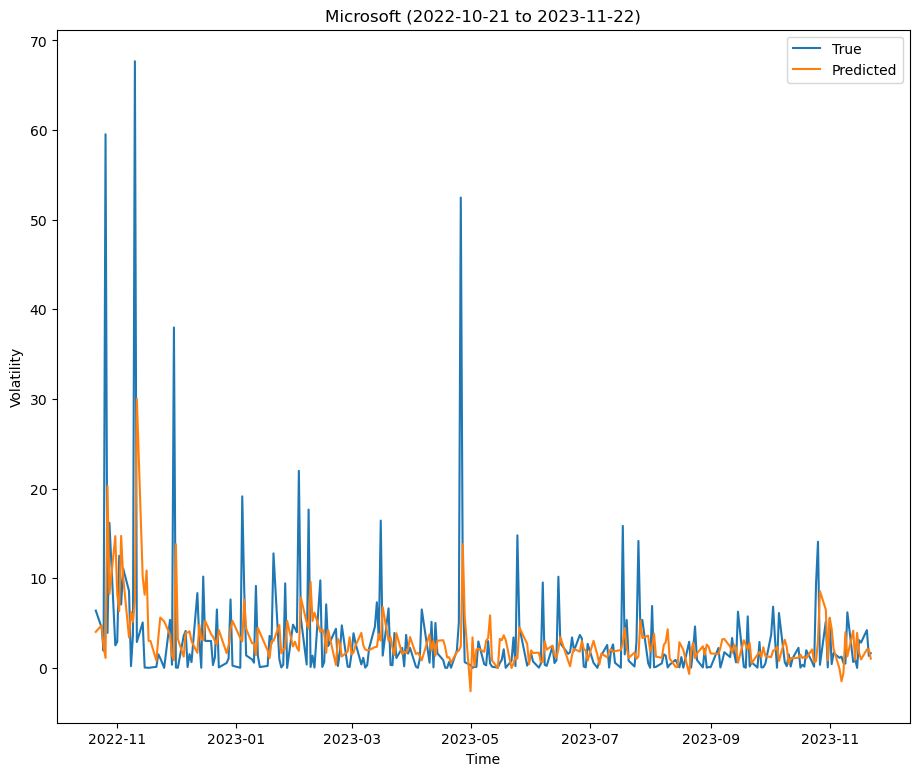

In [78]:
plt.plot(test['Microsoft'], label='True')
plt.plot(rolling_predictions['Microsoft'],label='Predicted')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.title('Microsoft (2022-10-21 to 2023-11-22)')
plt.legend()
plt.show()

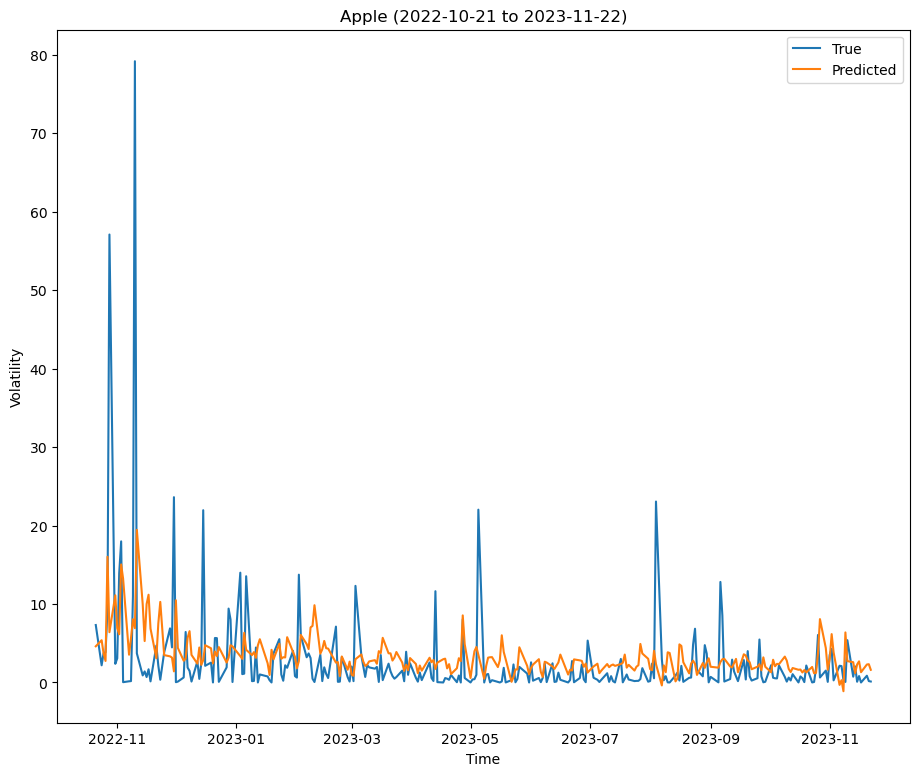

In [79]:
plt.plot(test['Apple'], label='True')
plt.plot(rolling_predictions['Apple'],label='Predicted')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.title('Apple (2022-10-21 to 2023-11-22)')
plt.legend()
plt.show()

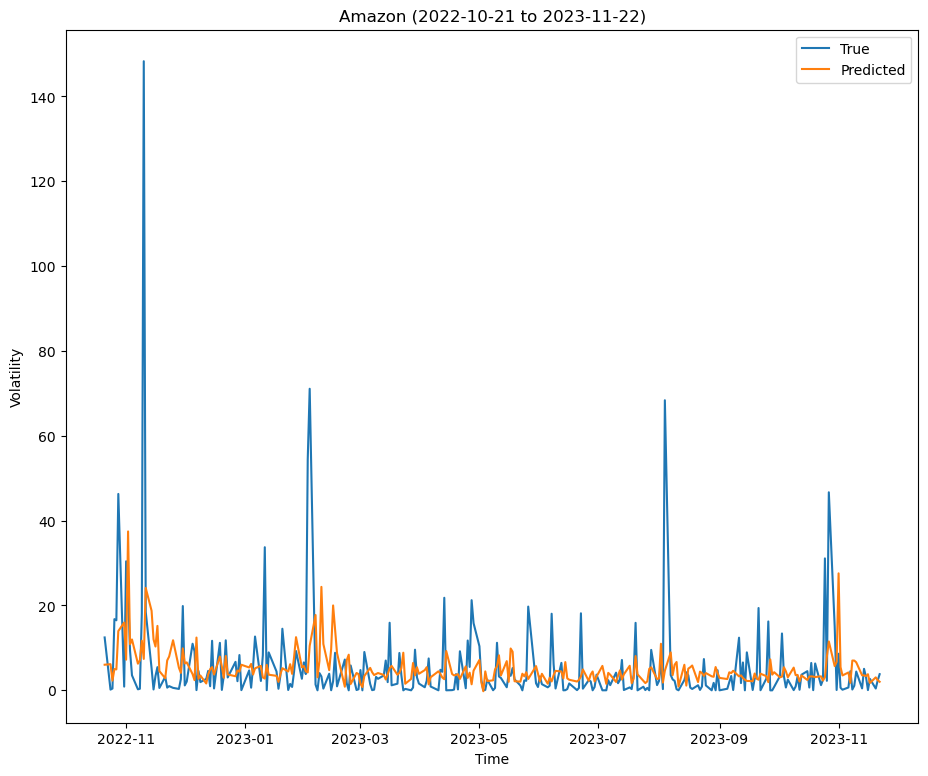

In [80]:
plt.plot(test['Amazon'], label='True')
plt.plot(rolling_predictions['Amazon'],label='Predicted')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.title('Amazon (2022-10-21 to 2023-11-22)')
plt.legend()
plt.show()

In [81]:
print('Rolling Forecast Accuracy of: Google')
accuracy_prod = forecast_accuracy(rolling_predictions['Google'], test['Google'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))


print('\n Rolling Forecast Accuracy of: Microsoft')
accuracy_prod = forecast_accuracy(rolling_predictions['Microsoft'], test['Microsoft'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))
    

print('\n Rolling Forecast Accuracy of: Apple')
accuracy_prod = forecast_accuracy(rolling_predictions['Apple'], test['Apple'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))
    

print('\n Rolling Forecast Accuracy of: Amazon')
accuracy_prod = forecast_accuracy(rolling_predictions['Amazon'], test['Amazon'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))
    
    

Rolling Forecast Accuracy of: Google
mse :  116.486
rmse :  10.7929

 Rolling Forecast Accuracy of: Microsoft
mse :  60.3525
rmse :  7.7687

 Rolling Forecast Accuracy of: Apple
mse :  46.825
rmse :  6.8429

 Rolling Forecast Accuracy of: Amazon
mse :  160.5964
rmse :  12.6727


In [82]:
# 这个最好放到ppt上

df_all.describe()

,Google,Microsoft,Apple,Amazon
count,2742.000000,2742.000000,2742.000000,2742.000000
mean,3.000857,2.895130,3.229239,4.269077
std,9.573473,9.208058,8.978875,12.350073
min,0.000003,0.000000,0.000000,0.000000
25%,0.124382,0.127904,0.156921,0.201535
50%,0.684190,0.661733,0.769192,0.997534
75%,2.532493,2.462521,2.865261,3.497747
max,257.680344,217.239760,165.500440,199.688712
